In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from pandas_profiling import ProfileReport as PR

In [3]:
df=pd.read_csv('car_data.csv')

In [4]:
file=PR(df)
file

In [5]:
df.shape

(1000, 5)

In [6]:
df.isnull()

,User_ID,Gender,Age,AnnualSalary,Purchased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
995,False,False,False,False,False
996,False,False,False,False,False
997,False,False,False,False,False
998,False,False,False,False,False


In [7]:
total = df.isnull().sum()
total

User_ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])

In [9]:
df.head()

,User_ID,Gender,Age,AnnualSalary,Purchased
0,385,1,35,20000,0
1,681,1,40,43500,0
2,353,1,49,74000,0
3,895,1,40,107500,1
4,661,1,25,79000,0


In [10]:
X = df.iloc[:,1:4]
Y = df.iloc[:,4]

In [11]:
X

,Gender,Age,AnnualSalary
0,1,35,20000
1,1,40,43500
2,1,49,74000
3,1,40,107500
4,1,25,79000
...,...,...,...
995,1,38,59000
996,0,47,23500
997,0,28,138500
998,0,48,134000


In [12]:
Y

0      0
1      0
2      0
3      1
4      0
      ..
995    0
996    0
997    1
998    1
999    0
Name: Purchased, Length: 1000, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.20,random_state=0)

In [14]:
X_test

,Gender,Age,AnnualSalary
993,0,54,136500
859,0,41,67500
298,1,50,29500
553,1,20,86000
672,1,27,31500
...,...,...,...
679,1,35,55000
722,0,39,128500
215,0,23,64500
653,0,40,80500


In [15]:
Y_test

993    0
859    0
298    1
553    0
672    0
      ..
679    0
722    1
215    0
653    0
150    0
Name: Purchased, Length: 200, dtype: int64

In [16]:
from sklearn.linear_model import LogisticRegression
logistic_regression=LogisticRegression()
logistic_regression.fit(X_train,Y_train)

LogisticRegression()

In [17]:
y_pred=logistic_regression.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [18]:
Y_test

993    0
859    0
298    1
553    0
672    0
      ..
679    0
722    1
215    0
653    0
150    0
Name: Purchased, Length: 200, dtype: int64

In [19]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test,y_pred)

In [20]:
cnf_matrix

array([[121,   0],
       [ 79,   0]], dtype=int64)

In [21]:
print('Accuracy',metrics.accuracy_score(y_pred,Y_test))

Accuracy 0.605


In [22]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier()
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [23]:
y_pred =model.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0], dtype=int64)

In [24]:
Y_test

993    0
859    0
298    1
553    0
672    0
      ..
679    0
722    1
215    0
653    0
150    0
Name: Purchased, Length: 200, dtype: int64

In [25]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test,y_pred)
cnf_matrix

array([[113,   8],
       [ 11,  68]], dtype=int64)

In [26]:
print('Accuracy',metrics.accuracy_score(y_pred,Y_test))

Accuracy 0.905


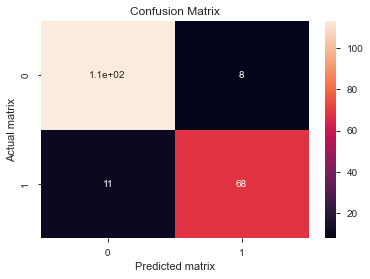

In [27]:
import seaborn as sb
%matplotlib inline
sb.heatmap(cnf_matrix,annot=True)
plt.title("Confusion Matrix")
plt.xlabel('Predicted matrix')
plt.ylabel('Actual matrix')
plt.show()